# Importing Dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from nltk.stem.porter import PorterStemmer
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import LSTM, Bidirectional, GRU, Bidirectional, Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Loading Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.shape

(50000, 2)

# Data Pre-Processing

In [6]:
data.isnull().any()

review       False
sentiment    False
dtype: bool

In [7]:
data['review'][4]

'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

In [8]:
corpus = []
stemmer = PorterStemmer()
STOPWORDS = set(stopwords.words("english"))
for i in range(0, data.shape[0]):
     review = re.sub(r'<[^>]+>', "", data.iloc[i]["review"])
     review = re.sub(r"\s+[a-zA-Z]\s+", ' ', review)
     review = re.sub(r'\s+', ' ', review)
     review = re.sub("[^a-zA-Z]", " ", review)
     review = review.lower().split()
     review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
     review = " ".join(review)
     corpus.append(review)

In [9]:
Y = data['sentiment']
Y = np.array(list(map(lambda x: 1 if x=="positive" else 0, Y)))
X = corpus
print(X[4])

petter mattei love time money visual stun film watch mr mattei offer us vivid portrait human relat movi seem tell us money power success peopl differ situat encount variat arthur schnitzler play theme director transfer action present time new york differ charact meet connect one connect one way anoth next person one seem know previou point contact stylishli film sophist luxuri look taken see peopl live world live habitat thing one get soul pictur differ stage loneli one inhabit big citi exactli best place human relat find sincer fulfil one discern case peopl encount act good mr mattei direct steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talent cast make charact come aliv wish mr mattei good luck await anxious next work


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [11]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [12]:
vocab_length = len(word_tokenizer.word_index)+1
vocab_length

64419

In [13]:
max_len=100
X_train=pad_sequences(X_train, padding='post',maxlen=max_len)
X_test=pad_sequences(X_test, padding='post',maxlen=max_len)

# LSTM Model

In [14]:
lstm_model = Sequential()
embedding_layer = Embedding(input_dim=vocab_length, output_dim=100, input_length=max_len)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(64,return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

In [15]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          6441900   
                                                                 
 lstm (LSTM)                 (None, 100, 64)           42240     
                                                                 
 dropout (Dropout)           (None, 100, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 6496589 (24.78 MB)
Trainable params: 64965

In [16]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [17]:
lstm_model_history = lstm_model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 100s 382ms/step - loss: 0.4114 - acc: 0.8030 - val_loss: 0.3084 - val_acc: 0.8777
Epoch 2/10
250/250 [==============================] - 89s 354ms/step - loss: 0.2068 - acc: 0.9254 - val_loss: 0.3407 - val_acc: 0.8659
Epoch 3/10
250/250 [==============================] - 87s 346ms/step - loss: 0.1256 - acc: 0.9582 - val_loss: 0.4192 - val_acc: 0.8619
Epoch 4/10
250/250 [==============================] - 97s 388ms/step - loss: 0.0798 - acc: 0.9743 - val_loss: 0.5249 - val_acc: 0.8601
Epoch 5/10
250/250 [==============================] - 88s 352ms/step - loss: 0.0643 - acc: 0.9800 - val_loss: 0.5360 - val_acc: 0.8585
Epoch 6/10
250/250 [==============================] - 91s 362ms/step - loss: 0.0511 - acc: 0.9848 - val_loss: 0.6437 - val_acc: 0.8543
Epoch 7/10
250/250 [==============================] - 88s 350ms/step - loss: 0.0382 - acc: 0.9885 - val_loss: 0.5410 - val_acc: 0.8555
Epoch 8/10
250/250 [==============================] - 

In [18]:
lstm_score = lstm_model.evaluate(X_test, Y_test, verbose=1)
print("Test Accuracy:", lstm_score[1])

313/313 [==============================] - 11s 34ms/step - loss: 0.5644 - acc: 0.8494
Test Accuracy: 0.849399983882904


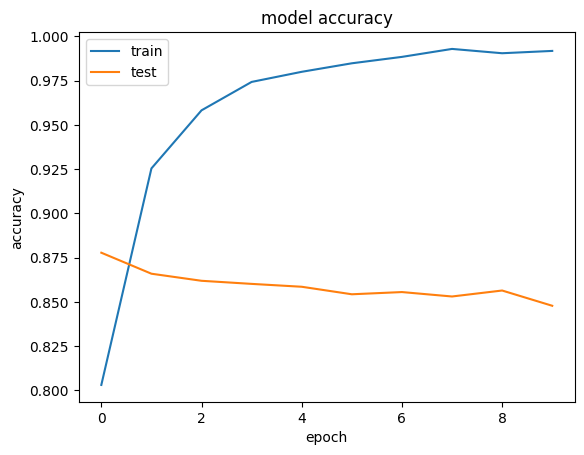

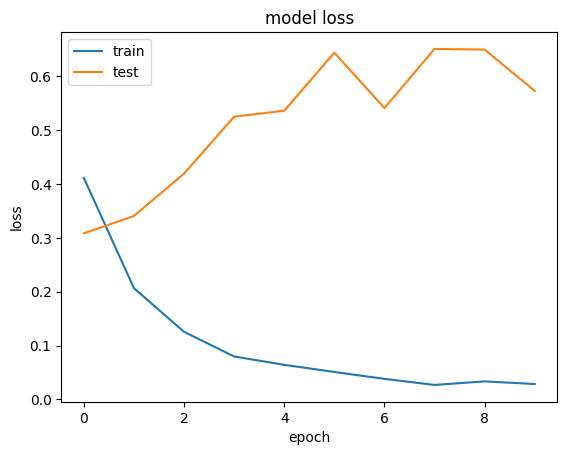

In [19]:
plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [20]:
lstm_model.save('lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# GRU Model

In [21]:
gru_model = Sequential()
embedding_layer = Embedding(input_dim=vocab_length, output_dim=100, input_length=max_len)

gru_model.add(embedding_layer)
gru_model.add(GRU(64,return_sequences=True))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(32))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1, activation='sigmoid'))

In [22]:
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          6441900   
                                                                 
 gru (GRU)                   (None, 100, 64)           31872     
                                                                 
 dropout_2 (Dropout)         (None, 100, 64)           0         
                                                                 
 gru_1 (GRU)                 (None, 32)                9408      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6483213 (24.73 MB)
Trainable params: 648

In [23]:
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [24]:
gru_model_history = gru_model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 84s 324ms/step - loss: 0.4620 - acc: 0.7530 - val_loss: 0.3059 - val_acc: 0.8721
Epoch 2/10
250/250 [==============================] - 81s 325ms/step - loss: 0.2290 - acc: 0.9145 - val_loss: 0.3081 - val_acc: 0.8789
Epoch 3/10
250/250 [==============================] - 80s 319ms/step - loss: 0.1381 - acc: 0.9534 - val_loss: 0.3749 - val_acc: 0.8702
Epoch 4/10
250/250 [==============================] - 82s 327ms/step - loss: 0.0860 - acc: 0.9725 - val_loss: 0.4834 - val_acc: 0.8586
Epoch 5/10
250/250 [==============================] - 79s 316ms/step - loss: 0.0554 - acc: 0.9821 - val_loss: 0.5996 - val_acc: 0.8622
Epoch 6/10
250/250 [==============================] - 78s 310ms/step - loss: 0.0348 - acc: 0.9900 - val_loss: 0.5592 - val_acc: 0.8579
Epoch 7/10
250/250 [==============================] - 82s 327ms/step - loss: 0.0277 - acc: 0.9918 - val_loss: 0.6798 - val_acc: 0.8555
Epoch 8/10
250/250 [==============================] - 8

In [25]:
gru_score = gru_model.evaluate(X_test, Y_test, verbose=1)
print("Test Accuracy:", gru_score[1])

313/313 [==============================] - 9s 27ms/step - loss: 0.6184 - acc: 0.8616
Test Accuracy: 0.8615999817848206


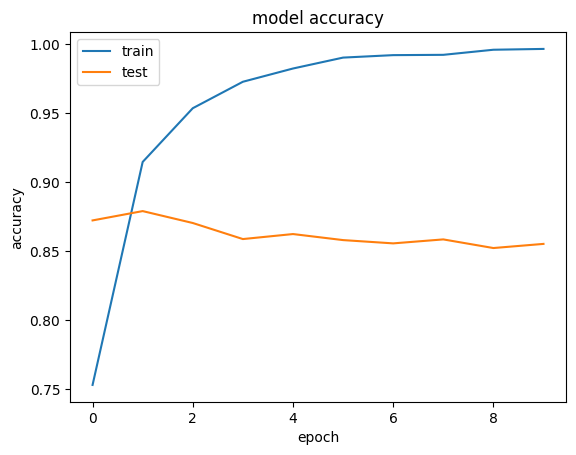

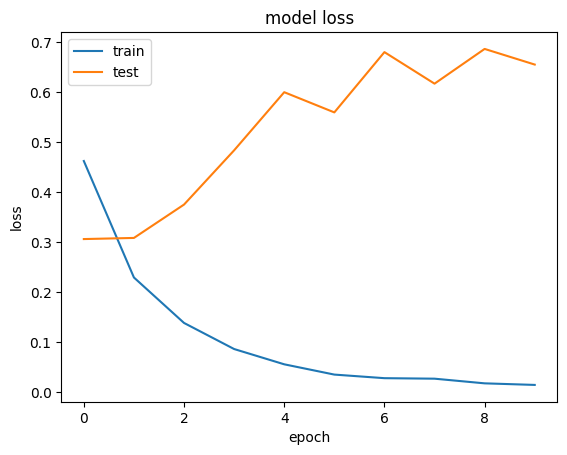

In [26]:
plt.plot(gru_model_history.history['acc'])
plt.plot(gru_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(gru_model_history.history['loss'])
plt.plot(gru_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [27]:
gru_model.save('gru.h5')

# BiLSTM Model

In [28]:
bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=vocab_length, output_dim=100, input_length=max_len))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Bidirectional(LSTM(32)))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Dense(1, activation='sigmoid'))

In [29]:
bilstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          6441900   
                                                                 
 bidirectional (Bidirection  (None, 100, 128)          84480     
 al)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 100, 128)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [30]:
bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [31]:
bilstm_model_history = bilstm_model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 195s 742ms/step - loss: 0.3832 - acc: 0.8166 - val_loss: 0.2918 - val_acc: 0.8788
Epoch 2/10
250/250 [==============================] - 171s 686ms/step - loss: 0.1947 - acc: 0.9264 - val_loss: 0.3210 - val_acc: 0.8745
Epoch 3/10
250/250 [==============================] - 180s 717ms/step - loss: 0.1086 - acc: 0.9629 - val_loss: 0.4009 - val_acc: 0.8652
Epoch 4/10
250/250 [==============================] - 170s 680ms/step - loss: 0.0630 - acc: 0.9790 - val_loss: 0.4583 - val_acc: 0.8585
Epoch 5/10
250/250 [==============================] - 177s 708ms/step - loss: 0.0532 - acc: 0.9827 - val_loss: 0.5317 - val_acc: 0.8546
Epoch 6/10
250/250 [==============================] - 183s 730ms/step - loss: 0.0357 - acc: 0.9893 - val_loss: 0.6534 - val_acc: 0.8577
Epoch 7/10
250/250 [==============================] - 176s 704ms/step - loss: 0.0204 - acc: 0.9939 - val_loss: 0.7032 - val_acc: 0.8519
Epoch 8/10
250/250 [============================

In [32]:
bilstm_score = bilstm_model.evaluate(X_test, Y_test, verbose=1)
print("Test Accuracy:", bilstm_score[1])

313/313 [==============================] - 16s 50ms/step - loss: 0.7790 - acc: 0.8516
Test Accuracy: 0.8515999913215637


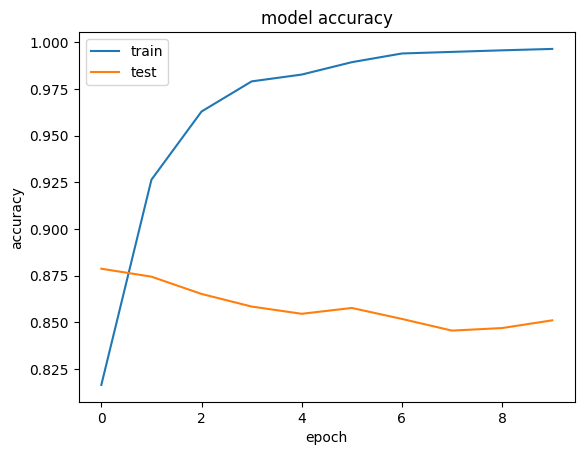

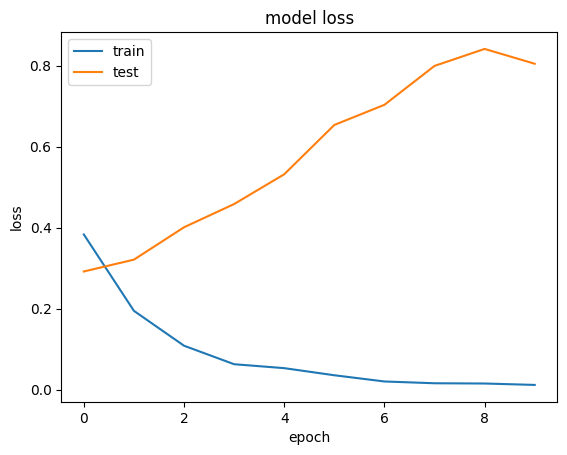

In [33]:
plt.plot(bilstm_model_history.history['acc'])
plt.plot(bilstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(bilstm_model_history.history['loss'])
plt.plot(bilstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [34]:
bilstm_model.save('bilstm.h5')

# BiGRU Model

In [35]:
bigru_model = Sequential()
bigru_model.add(Embedding(input_dim=vocab_length, output_dim=100, input_length=max_len))
bigru_model.add(Bidirectional(GRU(64, return_sequences=True)))
bigru_model.add(Dropout(0.2))
bigru_model.add(Bidirectional(GRU(32)))
bigru_model.add(Dropout(0.2))
bigru_model.add(Dense(1, activation='sigmoid'))

In [36]:
bigru_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          6441900   
                                                                 
 bidirectional_2 (Bidirecti  (None, 100, 128)          63744     
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 100, 128)          0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                31104     
 onal)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [37]:
bigru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [38]:
bigru_model_history = bigru_model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 159s 606ms/step - loss: 0.4089 - acc: 0.8063 - val_loss: 0.3046 - val_acc: 0.8763
Epoch 2/10
250/250 [==============================] - 150s 600ms/step - loss: 0.2004 - acc: 0.9262 - val_loss: 0.3111 - val_acc: 0.8724
Epoch 3/10
250/250 [==============================] - 149s 597ms/step - loss: 0.1127 - acc: 0.9606 - val_loss: 0.3576 - val_acc: 0.8704
Epoch 4/10
250/250 [==============================] - 151s 606ms/step - loss: 0.0665 - acc: 0.9779 - val_loss: 0.4528 - val_acc: 0.8565
Epoch 5/10
250/250 [==============================] - 154s 614ms/step - loss: 0.0409 - acc: 0.9870 - val_loss: 0.5880 - val_acc: 0.8577
Epoch 6/10
250/250 [==============================] - 151s 606ms/step - loss: 0.0291 - acc: 0.9907 - val_loss: 0.7454 - val_acc: 0.8550
Epoch 7/10
250/250 [==============================] - 153s 614ms/step - loss: 0.0161 - acc: 0.9950 - val_loss: 0.7597 - val_acc: 0.8519
Epoch 8/10
250/250 [============================

In [39]:
bigru_score = bigru_model.evaluate(X_test, Y_test, verbose=1)
print("Test Accuracy:", bigru_score[1])

313/313 [==============================] - 14s 46ms/step - loss: 0.7575 - acc: 0.8532
Test Accuracy: 0.8532000184059143


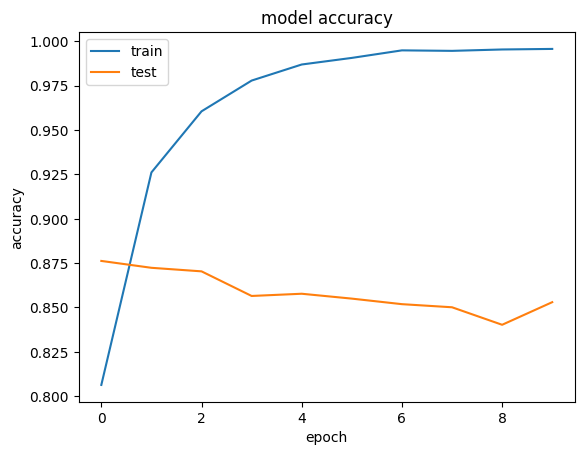

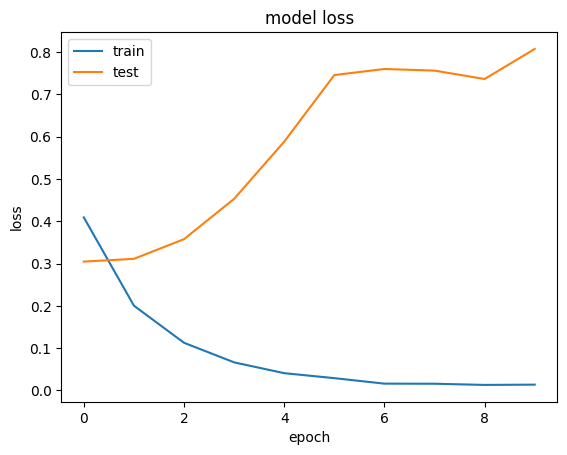

In [40]:
plt.plot(bigru_model_history.history['acc'])
plt.plot(bigru_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(bigru_model_history.history['loss'])
plt.plot(bigru_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [41]:
bigru_model.save('bigru.h5')